# Python

1.Fizzbuzz

In [1]:
N = 100
for n in xrange(1,N+1):
    output = ''
    if(n % 3 == 0):
        output += 'Fizz'
    if(n % 5 == 0):
        output += 'Buzz'
    print output or n

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz
Fizz
22
23
Fizz
Buzz
26
Fizz
28
29
FizzBuzz
31
32
Fizz
34
Buzz
Fizz
37
38
Fizz
Buzz
41
Fizz
43
44
FizzBuzz
46
47
Fizz
49
Buzz
Fizz
52
53
Fizz
Buzz
56
Fizz
58
59
FizzBuzz
61
62
Fizz
64
Buzz
Fizz
67
68
Fizz
Buzz
71
Fizz
73
74
FizzBuzz
76
77
Fizz
79
Buzz
Fizz
82
83
Fizz
Buzz
86
Fizz
88
89
FizzBuzz
91
92
Fizz
94
Buzz
Fizz
97
98
Fizz
Buzz


2.100-th Fibonacci number

In [2]:
def fib_calculation(n):
    previous_numb = 0
    numb = 1
    if (n == 0):
        return 0
    if (n == 1):
        return 1
    for _ in xrange(2, n + 1):
        (previous_numb,numb) = (numb,previous_numb + numb)
    return numb

In [3]:
fib_calculation(100)

354224848179261915075L

3.QuickSort

In [4]:
def partition(array):
    l = 1
    r = len(array) - 1
    while(True):
        while( l<len(array) and array[l] < array[0]):
            l += 1
        while(r > 0 and array[r] > array[0]):
            r -= 1
        if(l<r):
            array[l],array[r] = array[r],array[l]
        else:
            return r

In [5]:
def qsort(array):
    if(len(array) == 0 or len(array) == 1):
        return array
    if(len(array) == 2):
        if(array[0] <= array[1]):
            return array
        array[1],array[0] = array[0],array[1]
        return array
    mid = partition(array)
    return qsort(array[1:mid+1]) + [array[0]] + qsort(array[mid+1:])

In [6]:
import random

In [7]:
seq = [random.randint(-100,100) for i in range(10)]
qsort(seq)

[-98, -64, -51, -49, 28, 29, 33, 50, 67, 82]

One line qsort

In [8]:
line_qsort = lambda array: [] if not array else line_qsort(filter(lambda n: n<=array[0], array[1:]))+[array[0]]+line_qsort(filter(lambda n: n>array[0], array[1:]))

In [9]:
line_qsort(seq)

[-98, -64, -51, -49, 28, 29, 33, 50, 67, 82]

# NumPy

1.Linspace

In [10]:
import numpy as np
import time

In [11]:
def cycle_linspace(start,stop,num = 50):
    array = []
    step = (stop - start)/float(num-1)
    for i in xrange(num):
        array.append(start + i*step)
    return np.array(array) #for not bulky output      

In [12]:
def list_compr_linspace(start,stop,num = 50):
    step = (stop - start)/float(num-1)
    return np.array([start + i*step for i in xrange(num)])  #for not bulky output

In [13]:
def calculate_linspace_time(linspace,start = 0,stop = 2,num = 10000000,count = 3):
    result = np.zeros(count)
    start_time = 0
    finish_time = 0
    array = []
    for n in xrange(count):
        start_time = time.time()
        array = linspace(start,stop,num)
        finish_time = time.time()
        result[n] = finish_time - start_time
    return result       

In [14]:
print "np.linspace" , calculate_linspace_time(np.linspace,count = 5).mean()

np.linspace 0.134935426712


In [15]:
print "cycle_linspace", calculate_linspace_time(cycle_linspace,count = 5).mean()

cycle_linspace 4.52253098488


In [16]:
print "list_compr_linspace",calculate_linspace_time(list_compr_linspace,count = 5).mean()

list_compr_linspace 3.44292597771


2.Comparison list and np.ndarray

In [17]:
ndarray = np.random.randn(1000,1000)
check_list = ndarray.tolist()
add_array = np.random.randn(1000,1000)
add_list = add_array.tolist()

In [18]:
%%time
for i in xrange(1000):
    ndarray = np.hstack((ndarray,add_array[i].reshape((1000,1))))

CPU times: user 2.71 s, sys: 2.22 s, total: 4.93 s
Wall time: 4.93 s


In [19]:
%%time
new_list = []
for i in xrange(1000):
    new_list = check_list.append(add_list[i])

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 914 µs


In [20]:
check_list = ndarray.reshape((2000*1000)).tolist()

In [21]:
%%time
max(check_list)

CPU times: user 132 ms, sys: 0 ns, total: 132 ms
Wall time: 133 ms


5.119430149946426

In [22]:
%%time
ndarray.max()

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.14 ms


5.1194301499464263

In [23]:
ndarray = np.random.rand(10000,1)
check_list = ndarray.tolist()
add_array = np.random.randn(10000,1)

In [24]:
%%time
for el in add_array:
    ndarray = np.append(ndarray,el)

CPU times: user 236 ms, sys: 12 ms, total: 248 ms
Wall time: 246 ms


In [25]:
%%time
new_list = []
for el in add_array:
    new_list = check_list.append(el)

CPU times: user 8 ms, sys: 8 ms, total: 16 ms
Wall time: 10.9 ms


# Matplotlib

In [26]:
from matplotlib import pylab as plt
%matplotlib inline

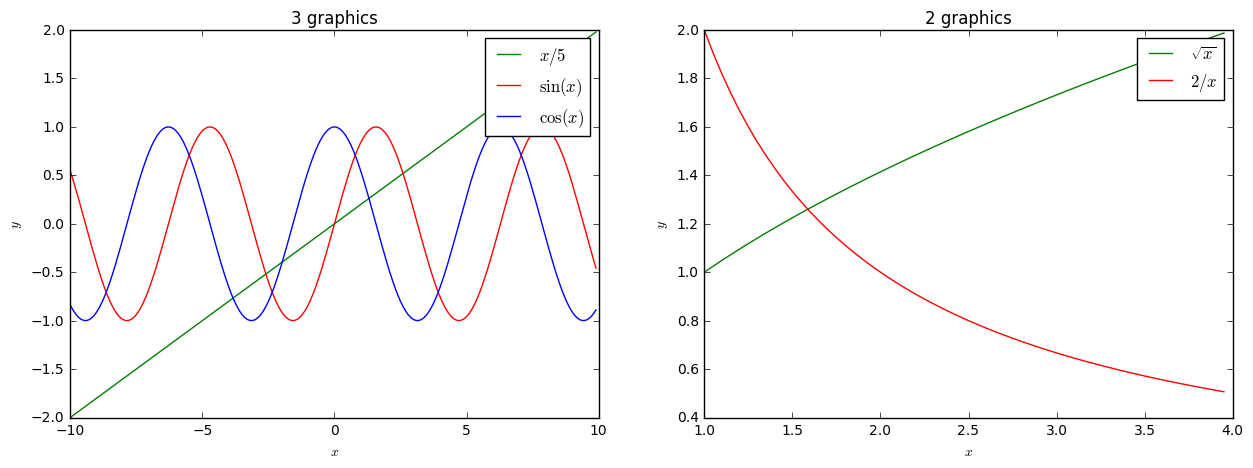

In [27]:
x1 = np.arange(-10,10,0.1) 
x2 = np.arange(1,4,0.05)
fig, axes = plt.subplots(1, 2, figsize=(15,5))

line1, = axes[0].plot(x1,x1/5.,'g',label = r'$x/5$')
axes[0].plot(x1,np.sin(x1),'r',label = r'$\sin(x)$')
axes[0].plot(x1,np.cos(x1),'b',label = r'$\cos(x)$')
axes[0].legend()
axes[0].set_xlabel(r'$x$')
axes[0].set_ylabel(r'$y$')
axes[0].set_title('3 graphics')

axes[1].plot(x2,np.sqrt(x2),'g',label = r'$\sqrt{x}$')
axes[1].plot(x2,2/x2,'r',label = r'$2/x$')
axes[1].legend()
axes[1].set_xlabel(r'$x$')
axes[1].set_ylabel(r'$y$')
axes[1].set_title('2 graphics')

plt.show()

In [28]:
fig.savefig('my_fig.pdf')

# SciPy

In [29]:
from scipy import linalg

In [30]:
X = np.random.randn(5,5)
eigenvalues,eigenvectors = linalg.eig(X)

In [31]:
for i in range(len(eigenvalues)):
    eps = 1.0e-14
    if(~abs(X.dot(eigenvectors[:,i]) - eigenvectors[:,i]*eigenvalues[i] < eps).all()):
        print 'Error'